# Example 10.2: Non-Ideal Rankine Cycle

*John F. Maddox, Ph.D., P.E.<br>
University of Kentucky - Paducah Campus<br>
ME 321: Engineering Thermodynamics II<br>*

## Problem Statement
A Rankine cycle operates with water as the working fluid with a turbine inlet pressure of 3 MPa, a condenser pressure of 15 kPa, and no superheat in the boiler.  For For isentropic efficiencies of $\eta_t=0.8$ and $\eta_p=0.6$  and $\dot{W}_\text{Net}=1\ \mathrm{MW}$ Find:
* (a) Mass flow rate of steam (kg/s)
* (b) Boiler heat transfer (MW)
* (c) Thermal efficiency of the cycle
* (d) Sketch a $T$-$s$ diagram of the cycle
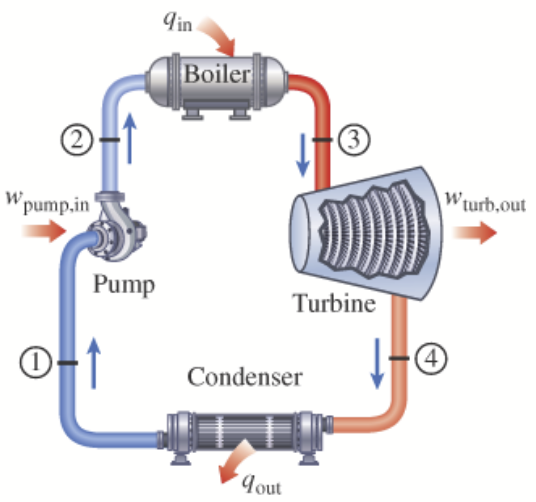

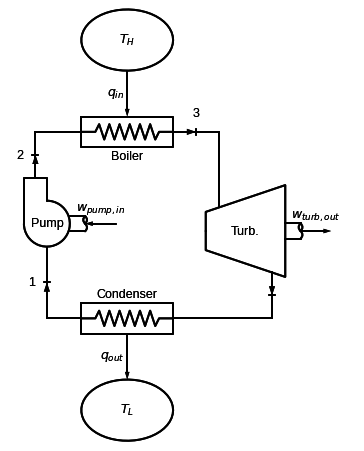

In [3]:
#import schematics # <- uncomment to regenerate schematic
#schematics.rankine(file='Figures/Rankine.png'); # <- uncomment to regenerate schematic
from IPython.display import Image
Image('Figures/Rankine.png')

## Solution

__[Video Explanation](https://uky.yuja.com/V/Video?v=3074261&node=10465193&a=1519284077&autoplay=1)__

### Python Initialization
We'll start by importing the libraries we will use for our analysis and initializing dictionaries to hold the properties we will be usings.

In [3]:
from kilojoule.templates.kSI_C import *
   
water = realfluid.Properties('Water')

### Given Parameters
We now define variables to hold our known values.

In [4]:
p[3] = Quantity(3.0,'MPa')         # Turbine inlet pressure
p[1] = p[4] = Quantity(15.0,'kPa') # Condenser pressure
Wdot_net = Quantity(1,'MW')        # Net power 
eta_t = 0.8                        # Turbine isentropic efficiency
eta_p = 0.6                        # Pump isentropic efficiency
  
Summary(show=True);

<IPython.core.display.Latex object>

,$p$ [kPa]
1,15.0
3,3000.0
4,15.0


### Assumptions
- Non-ideal work devices
- No superheat: saturated vapor at boiler exit
- Single phase into pump: saturated liquid at condenser exit
- Isobaric heat exchagners
- Negligible changes in kinetic energy
- Negligible changes in potential energy

In [5]:
x[3] = 1      # No superheat
x[1] = 0      # Single phase into pump
p[2] = p[3]   # isobaric heat exchanger

Summary(show=True);

<IPython.core.display.Latex object>

,$p$ [kPa],$x$ []
1,15.0,0.0
2,3000.0,-
3,3000.0,1.0
4,15.0,-


#### (a) Mass flow rate

In [6]:
%%showcalc
"### State 1)"
T[1] = water.T(p[1],x[1])
v[1] = water.v(p[1],x[1])
h[1] = water.h(p[1],x[1])
s[1] = water.s(p[1],x[1])

"### 1-2) Non-ideal compression"
"Isentropic compression"
p['2s'] = p[2]
s['2s'] = s[1]
T['2s'] = water.T(p['2s'],s['2s'])
h['2s'] = water.h(p['2s'],s['2s'])
v['2s'] = water.v(p['2s'],s['2s'])
"Actual compression"
h[2] = h[1] + (h['2s']-h[1])/eta_p
T[2] = water.T(p[2],h=h[2])
v[2] = water.v(p[2],h=h[2])
s[2] = water.s(p[2],h=h[2])
w_1_to_2 = h[1]-h[2]

"### 2-3) Isobaric heat addition"
T[3] = water.T(p[3],x[3])
v[3] = water.v(p[3],x[3])
h[3] = water.h(p[3],x[3])
s[3] = water.s(p[3],x[3])

"### 3-4) Non-ideal expansion"
"Isentropic Expansion"
p['4s'] = p[4]
s['4s'] = s[3]
T['4s']= water.T(p['4s'],s['4s'])
v['4s']= water.v(p['4s'],s['4s'])
h['4s'] = water.h(p['4s'],s['4s'])
x['4s'] = water.x(p['4s'],s['4s'])
"Actual expansion"
h[4] = h[3] - eta_t*(h[3]-h['4s'])
T[4] = water.T(p[4],h=h[4])
v[4] = water.v(p[4],h=h[4])
s[4] = water.s(p[4],h=h[4])
x[4] = water.x(p[4],h=h[4])
w_3_to_4 = h[3]-h[4]

"### Mass flow rate"
w_net = w_1_to_2 + w_3_to_4
mdot = (Wdot_net/w_net).to('kg/s')

### State 1)
\begin{align}
  {T}_{ 1 } &=  \mathrm{ \underset{ water }{ T } }\left( {p}_{ 1 }, {x}_{ 1 } \right)  = \mathrm{ \underset{ water }{ T } }\left( 15.0\ \mathrm{kPa}, 0 \right) = 53.969\ \mathrm{°C}
\end{align}

\begin{align}
  {v}_{ 1 } &=  \mathrm{ \underset{ water }{ v } }\left( {p}_{ 1 }, {x}_{ 1 } \right)  = \mathrm{ \underset{ water }{ v } }\left( 15.0\ \mathrm{kPa}, 0 \right) = 0.001014\ \frac{\mathrm{m}^{3}}{\mathrm{kg}}
\end{align}

\begin{align}
  {h}_{ 1 } &=  \mathrm{ \underset{ water }{ h } }\left( {p}_{ 1 }, {x}_{ 1 } \right)  = \mathrm{ \underset{ water }{ h } }\left( 15.0\ \mathrm{kPa}, 0 \right) = 225.94\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

\begin{align}
  {s}_{ 1 } &=  \mathrm{ \underset{ water }{ s } }\left( {p}_{ 1 }, {x}_{ 1 } \right)  = \mathrm{ \underset{ water }{ s } }\left( 15.0\ \mathrm{kPa}, 0 \right) = 0.75486\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)}
\end{align}

### 1-2) Non-ideal compression
Isentropic compression
\begin{align}
  {p}_{ \mathrm{2s} } &=  {p}_{ 2 }  = 3000.0\ \mathrm{kPa} 
\end{align}

\begin{align}
  {s}_{ \mathrm{2s} } &=  {s}_{ 1 }  = 0.75486\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)} 
\end{align}

\begin{align}
  {T}_{ \mathrm{2s} } &=  \mathrm{ \underset{ water }{ T } }\left( {p}_{ \mathrm{2s} }, {s}_{ \mathrm{2s} } \right)  = \mathrm{ \underset{ water }{ T } }\left( 3000.0\ \mathrm{kPa}, 0.75486\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)} \right) = 54.084\ \mathrm{°C}
\end{align}

\begin{align}
  {h}_{ \mathrm{2s} } &=  \mathrm{ \underset{ water }{ h } }\left( {p}_{ \mathrm{2s} }, {s}_{ \mathrm{2s} } \right)  = \mathrm{ \underset{ water }{ h } }\left( 3000.0\ \mathrm{kPa}, 0.75486\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)} \right) = 228.97\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

\begin{align}
  {v}_{ \mathrm{2s} } &=  \mathrm{ \underset{ water }{ v } }\left( {p}_{ \mathrm{2s} }, {s}_{ \mathrm{2s} } \right)  = \mathrm{ \underset{ water }{ v } }\left( 3000.0\ \mathrm{kPa}, 0.75486\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)} \right) = 0.0010128\ \frac{\mathrm{m}^{3}}{\mathrm{kg}}
\end{align}

Actual compression
\begin{align}
  {h}_{ 2 } &=  {h}_{ 1 } + \frac{  {h}_{ \mathrm{2s} } - {h}_{ 1 }  }{ \eta_{p} } \\
    &= 225.94\ \frac{\mathrm{kJ}}{\mathrm{kg}} + \frac{  228.97\ \frac{\mathrm{kJ}}{\mathrm{kg}} - 225.94\ \frac{\mathrm{kJ}}{\mathrm{kg}}  }{  0.6  }\\
    &= 230.99\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

\begin{align}
  {T}_{ 2 } &=  \mathrm{ \underset{ water }{ T } }\left( {p}_{ 2 }, \mathrm{ h } = {h}_{ 2 } \right)  = \mathrm{ \underset{ water }{ T } }\left( 3000.0\ \mathrm{kPa}, \mathrm{ h } = 230.99\ \frac{\mathrm{kJ}}{\mathrm{kg}} \right) = 54.567\ \mathrm{°C}
\end{align}

\begin{align}
  {v}_{ 2 } &=  \mathrm{ \underset{ water }{ v } }\left( {p}_{ 2 }, \mathrm{ h } = {h}_{ 2 } \right)  = \mathrm{ \underset{ water }{ v } }\left( 3000.0\ \mathrm{kPa}, \mathrm{ h } = 230.99\ \frac{\mathrm{kJ}}{\mathrm{kg}} \right) = 0.001013\ \frac{\mathrm{m}^{3}}{\mathrm{kg}}
\end{align}

\begin{align}
  {s}_{ 2 } &=  \mathrm{ \underset{ water }{ s } }\left( {p}_{ 2 }, \mathrm{ h } = {h}_{ 2 } \right)  = \mathrm{ \underset{ water }{ s } }\left( 3000.0\ \mathrm{kPa}, \mathrm{ h } = 230.99\ \frac{\mathrm{kJ}}{\mathrm{kg}} \right) = 0.76102\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)}
\end{align}

\begin{align}
  w_{1\to{}2} &=   {h}_{ 1 } - {h}_{ 2 }  \\
    &=  225.94\ \frac{\mathrm{kJ}}{\mathrm{kg}} - 230.99\ \frac{\mathrm{kJ}}{\mathrm{kg}} \\
    &= -5.0417\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

### 2-3) Isobaric heat addition
\begin{align}
  {T}_{ 3 } &=  \mathrm{ \underset{ water }{ T } }\left( {p}_{ 3 }, {x}_{ 3 } \right)  = \mathrm{ \underset{ water }{ T } }\left( 3000.0\ \mathrm{kPa}, 1 \right) = 233.85\ \mathrm{°C}
\end{align}

\begin{align}
  {v}_{ 3 } &=  \mathrm{ \underset{ water }{ v } }\left( {p}_{ 3 }, {x}_{ 3 } \right)  = \mathrm{ \underset{ water }{ v } }\left( 3000.0\ \mathrm{kPa}, 1 \right) = 0.066664\ \frac{\mathrm{m}^{3}}{\mathrm{kg}}
\end{align}

\begin{align}
  {h}_{ 3 } &=  \mathrm{ \underset{ water }{ h } }\left( {p}_{ 3 }, {x}_{ 3 } \right)  = \mathrm{ \underset{ water }{ h } }\left( 3000.0\ \mathrm{kPa}, 1 \right) = 2803.2\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

\begin{align}
  {s}_{ 3 } &=  \mathrm{ \underset{ water }{ s } }\left( {p}_{ 3 }, {x}_{ 3 } \right)  = \mathrm{ \underset{ water }{ s } }\left( 3000.0\ \mathrm{kPa}, 1 \right) = 6.1856\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)}
\end{align}

### 3-4) Non-ideal expansion
Isentropic Expansion
\begin{align}
  {p}_{ \mathrm{4s} } &=  {p}_{ 4 }  = 15.0\ \mathrm{kPa} 
\end{align}

\begin{align}
  {s}_{ \mathrm{4s} } &=  {s}_{ 3 }  = 6.1856\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)} 
\end{align}

\begin{align}
  {T}_{ \mathrm{4s} } &=  \mathrm{ \underset{ water }{ T } }\left( {p}_{ \mathrm{4s} }, {s}_{ \mathrm{4s} } \right)  = \mathrm{ \underset{ water }{ T } }\left( 15.0\ \mathrm{kPa}, 6.1856\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)} \right) = 53.969\ \mathrm{°C}
\end{align}

\begin{align}
  {v}_{ \mathrm{4s} } &=  \mathrm{ \underset{ water }{ v } }\left( {p}_{ \mathrm{4s} }, {s}_{ \mathrm{4s} } \right)  = \mathrm{ \underset{ water }{ v } }\left( 15.0\ \mathrm{kPa}, 6.1856\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)} \right) = 7.5037\ \frac{\mathrm{m}^{3}}{\mathrm{kg}}
\end{align}

\begin{align}
  {h}_{ \mathrm{4s} } &=  \mathrm{ \underset{ water }{ h } }\left( {p}_{ \mathrm{4s} }, {s}_{ \mathrm{4s} } \right)  = \mathrm{ \underset{ water }{ h } }\left( 15.0\ \mathrm{kPa}, 6.1856\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)} \right) = 2002.4\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

\begin{align}
  {x}_{ \mathrm{4s} } &=  \mathrm{ \underset{ water }{ x } }\left( {p}_{ \mathrm{4s} }, {s}_{ \mathrm{4s} } \right)  = \mathrm{ \underset{ water }{ x } }\left( 15.0\ \mathrm{kPa}, 6.1856\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)} \right) = 0.74884
\end{align}

Actual expansion
\begin{align}
  {h}_{ 4 } &=   {h}_{ 3 } -  \eta_{t}  \cdot  \left(  {h}_{ 3 } - {h}_{ \mathrm{4s} }  \right)   \\
    &=  2803.2\ \frac{\mathrm{kJ}}{\mathrm{kg}} -   0.8   \cdot  \left(  2803.2\ \frac{\mathrm{kJ}}{\mathrm{kg}} - 2002.4\ \frac{\mathrm{kJ}}{\mathrm{kg}}  \right)  \\
    &= 2162.6\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

\begin{align}
  {T}_{ 4 } &=  \mathrm{ \underset{ water }{ T } }\left( {p}_{ 4 }, \mathrm{ h } = {h}_{ 4 } \right)  = \mathrm{ \underset{ water }{ T } }\left( 15.0\ \mathrm{kPa}, \mathrm{ h } = 2162.6\ \frac{\mathrm{kJ}}{\mathrm{kg}} \right) = 53.969\ \mathrm{°C}
\end{align}

\begin{align}
  {v}_{ 4 } &=  \mathrm{ \underset{ water }{ v } }\left( {p}_{ 4 }, \mathrm{ h } = {h}_{ 4 } \right)  = \mathrm{ \underset{ water }{ v } }\left( 15.0\ \mathrm{kPa}, \mathrm{ h } = 2162.6\ \frac{\mathrm{kJ}}{\mathrm{kg}} \right) = 8.18\ \frac{\mathrm{m}^{3}}{\mathrm{kg}}
\end{align}

\begin{align}
  {s}_{ 4 } &=  \mathrm{ \underset{ water }{ s } }\left( {p}_{ 4 }, \mathrm{ h } = {h}_{ 4 } \right)  = \mathrm{ \underset{ water }{ s } }\left( 15.0\ \mathrm{kPa}, \mathrm{ h } = 2162.6\ \frac{\mathrm{kJ}}{\mathrm{kg}} \right) = 6.6751\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)}
\end{align}

\begin{align}
  {x}_{ 4 } &=  \mathrm{ \underset{ water }{ x } }\left( {p}_{ 4 }, \mathrm{ h } = {h}_{ 4 } \right)  = \mathrm{ \underset{ water }{ x } }\left( 15.0\ \mathrm{kPa}, \mathrm{ h } = 2162.6\ \frac{\mathrm{kJ}}{\mathrm{kg}} \right) = 0.81634
\end{align}

\begin{align}
  w_{3\to{}4} &=   {h}_{ 3 } - {h}_{ 4 }  \\
    &=  2803.2\ \frac{\mathrm{kJ}}{\mathrm{kg}} - 2162.6\ \frac{\mathrm{kJ}}{\mathrm{kg}} \\
    &= 640.57\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

### Mass flow rate
\begin{align}
  w_{net} &=  w_{1\to{}2} + w_{3\to{}4} \\
    &= -5.0417\ \frac{\mathrm{kJ}}{\mathrm{kg}} + 640.57\ \frac{\mathrm{kJ}}{\mathrm{kg}}\\
    &= 635.53\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

\begin{align}
  \dot{m} &=  \frac{ \dot{W}_{net} }{ w_{net} } \\
    &= \frac{ 1\ \mathrm{MW} }{ 635.53\ \frac{\mathrm{kJ}}{\mathrm{kg}} }\\
    &= 1.5735\ \frac{\mathrm{kg}}{\mathrm{s}}
\end{align}



#### (b) Boiler heat transfer (MW)

In [7]:
%%showcalc
"### Boiler First Law"
q_2_to_3 = h[3]-h[2]
Qdot_in = mdot*q_2_to_3

### Boiler First Law
\begin{align}
  q_{2\to{}3} &=   {h}_{ 3 } - {h}_{ 2 }  \\
    &=  2803.2\ \frac{\mathrm{kJ}}{\mathrm{kg}} - 230.99\ \frac{\mathrm{kJ}}{\mathrm{kg}} \\
    &= 2572.2\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

\begin{align}
  \dot{Q}_{in} &=   \dot{m}  \cdot  q_{2\to{}3}  \\
    &=  1.5735\ \frac{\mathrm{kg}}{\mathrm{s}}  \cdot  2572.2\ \frac{\mathrm{kJ}}{\mathrm{kg}} \\
    &= 4047.3\ \frac{\mathrm{kJ}}{\mathrm{s}}
\end{align}



#### (c) Thermal efficiency

In [8]:
%%showcalc
eta_th = (Wdot_net/Qdot_in).to('')

\begin{align}
  \eta_{th} &=  \frac{ \dot{W}_{net} }{ \dot{Q}_{in} } \\
    &= \frac{ 1\ \mathrm{MW} }{ 4047.3\ \frac{\mathrm{kJ}}{\mathrm{s}} }\\
    &= 0.24708
\end{align}



#### (d) Diagrams

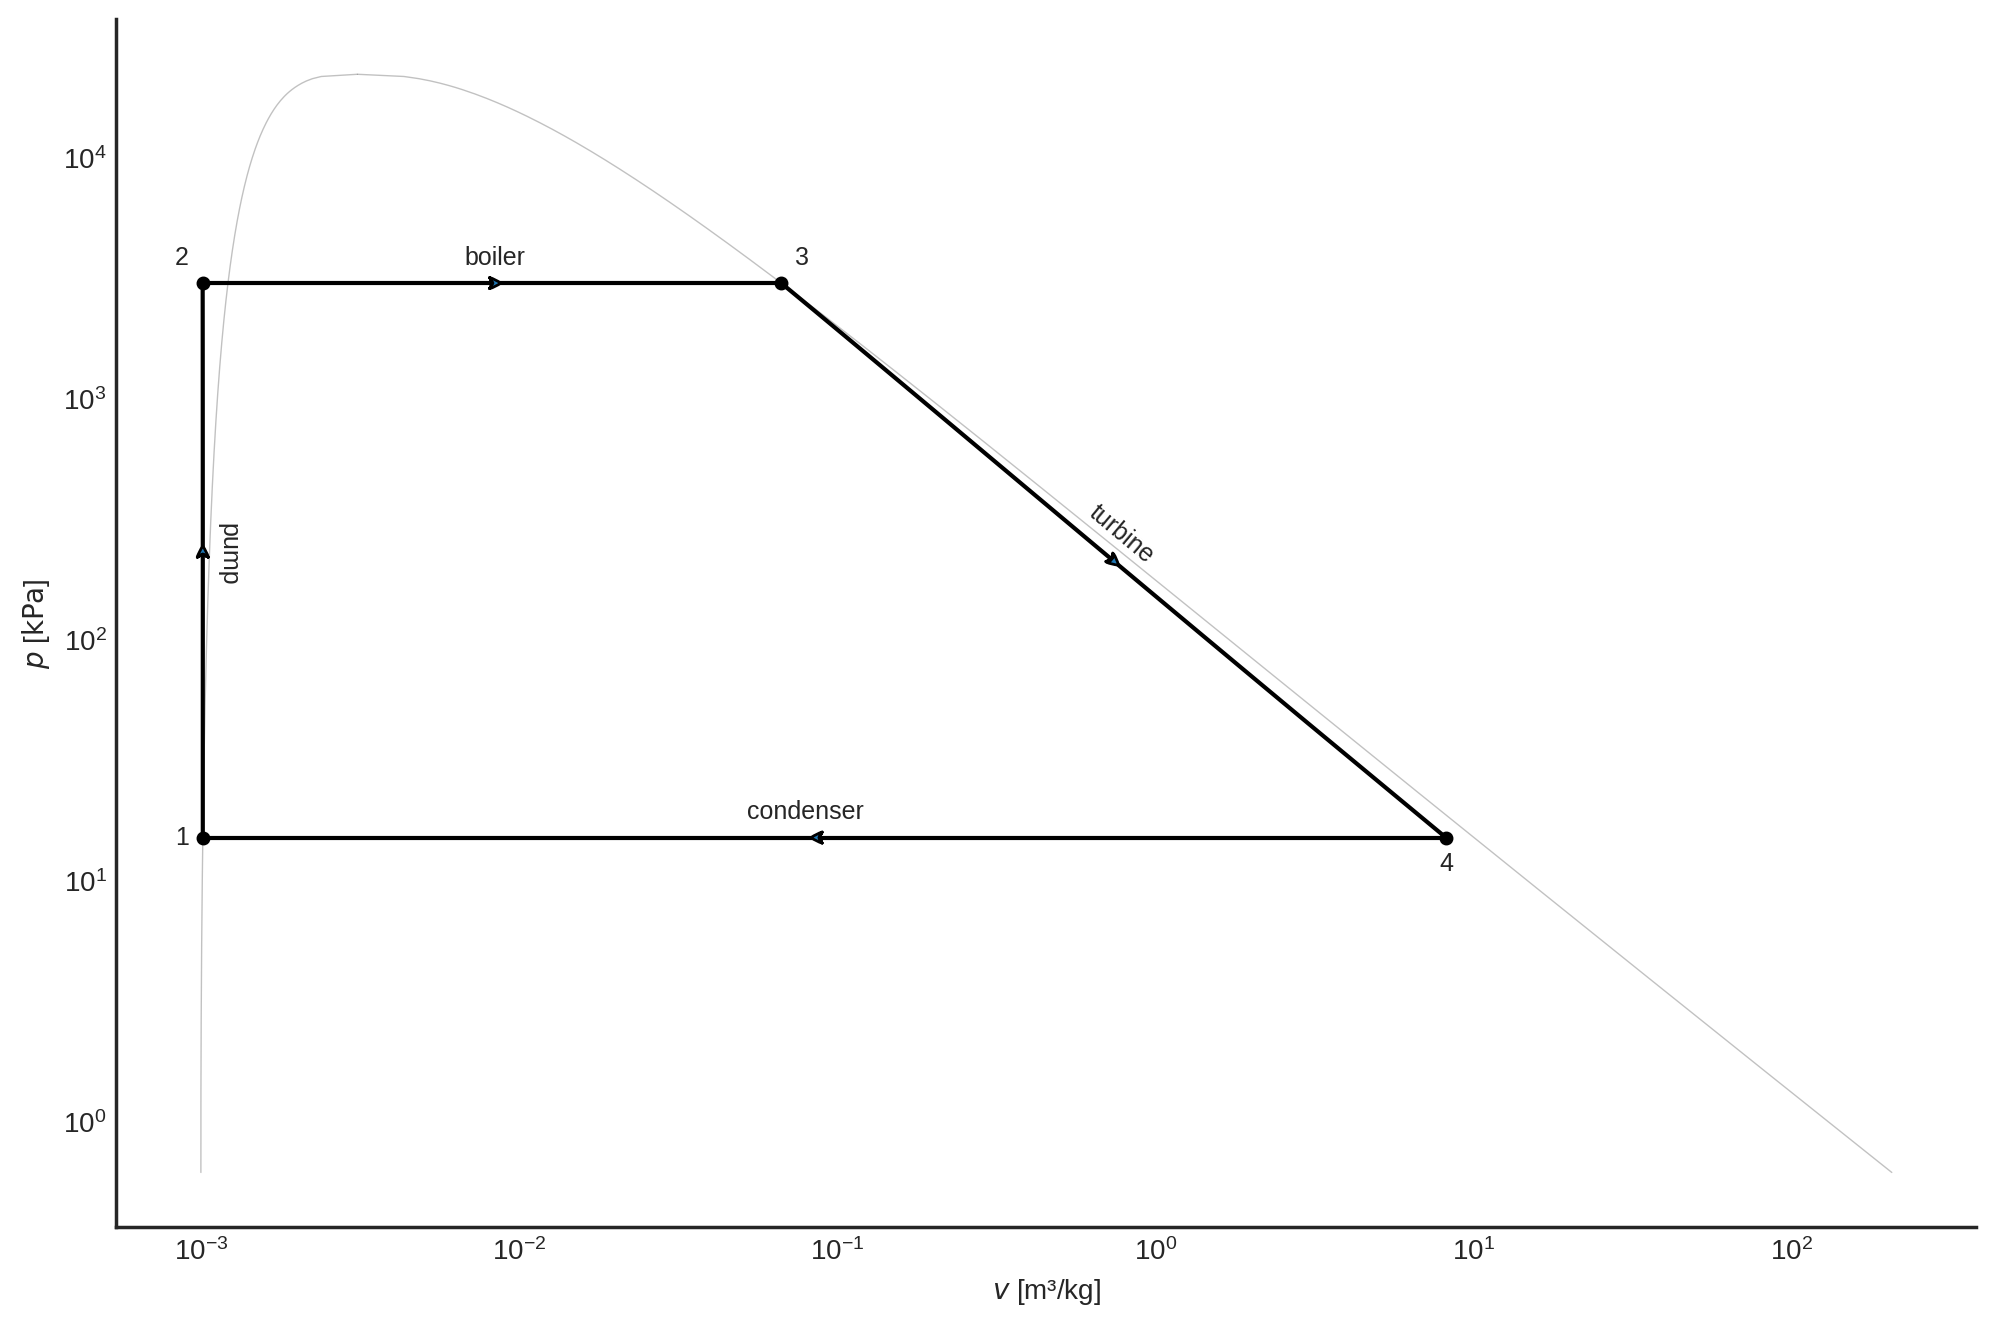

In [9]:
pv = water.pv_diagram()

for state in [1,2,3,4]:
    v[state] = water.v(p[state],h=h[state])

pv.plot_state(states[1],label_loc='west')
pv.plot_state(states[2],label_loc='north west')
pv.plot_state(states[3],label_loc='north east')
pv.plot_state(states[4],label_loc='south')

pv.plot_process(states[1],states[2],path='nonideal',label='pump')
pv.plot_process(states[2],states[3],path='isobaric',label='boiler')
pv.plot_process(states[3],states[4],path='nonideal',label='turbine')
pv.plot_process(states[4],states[1],path='isobaric',label='condenser');

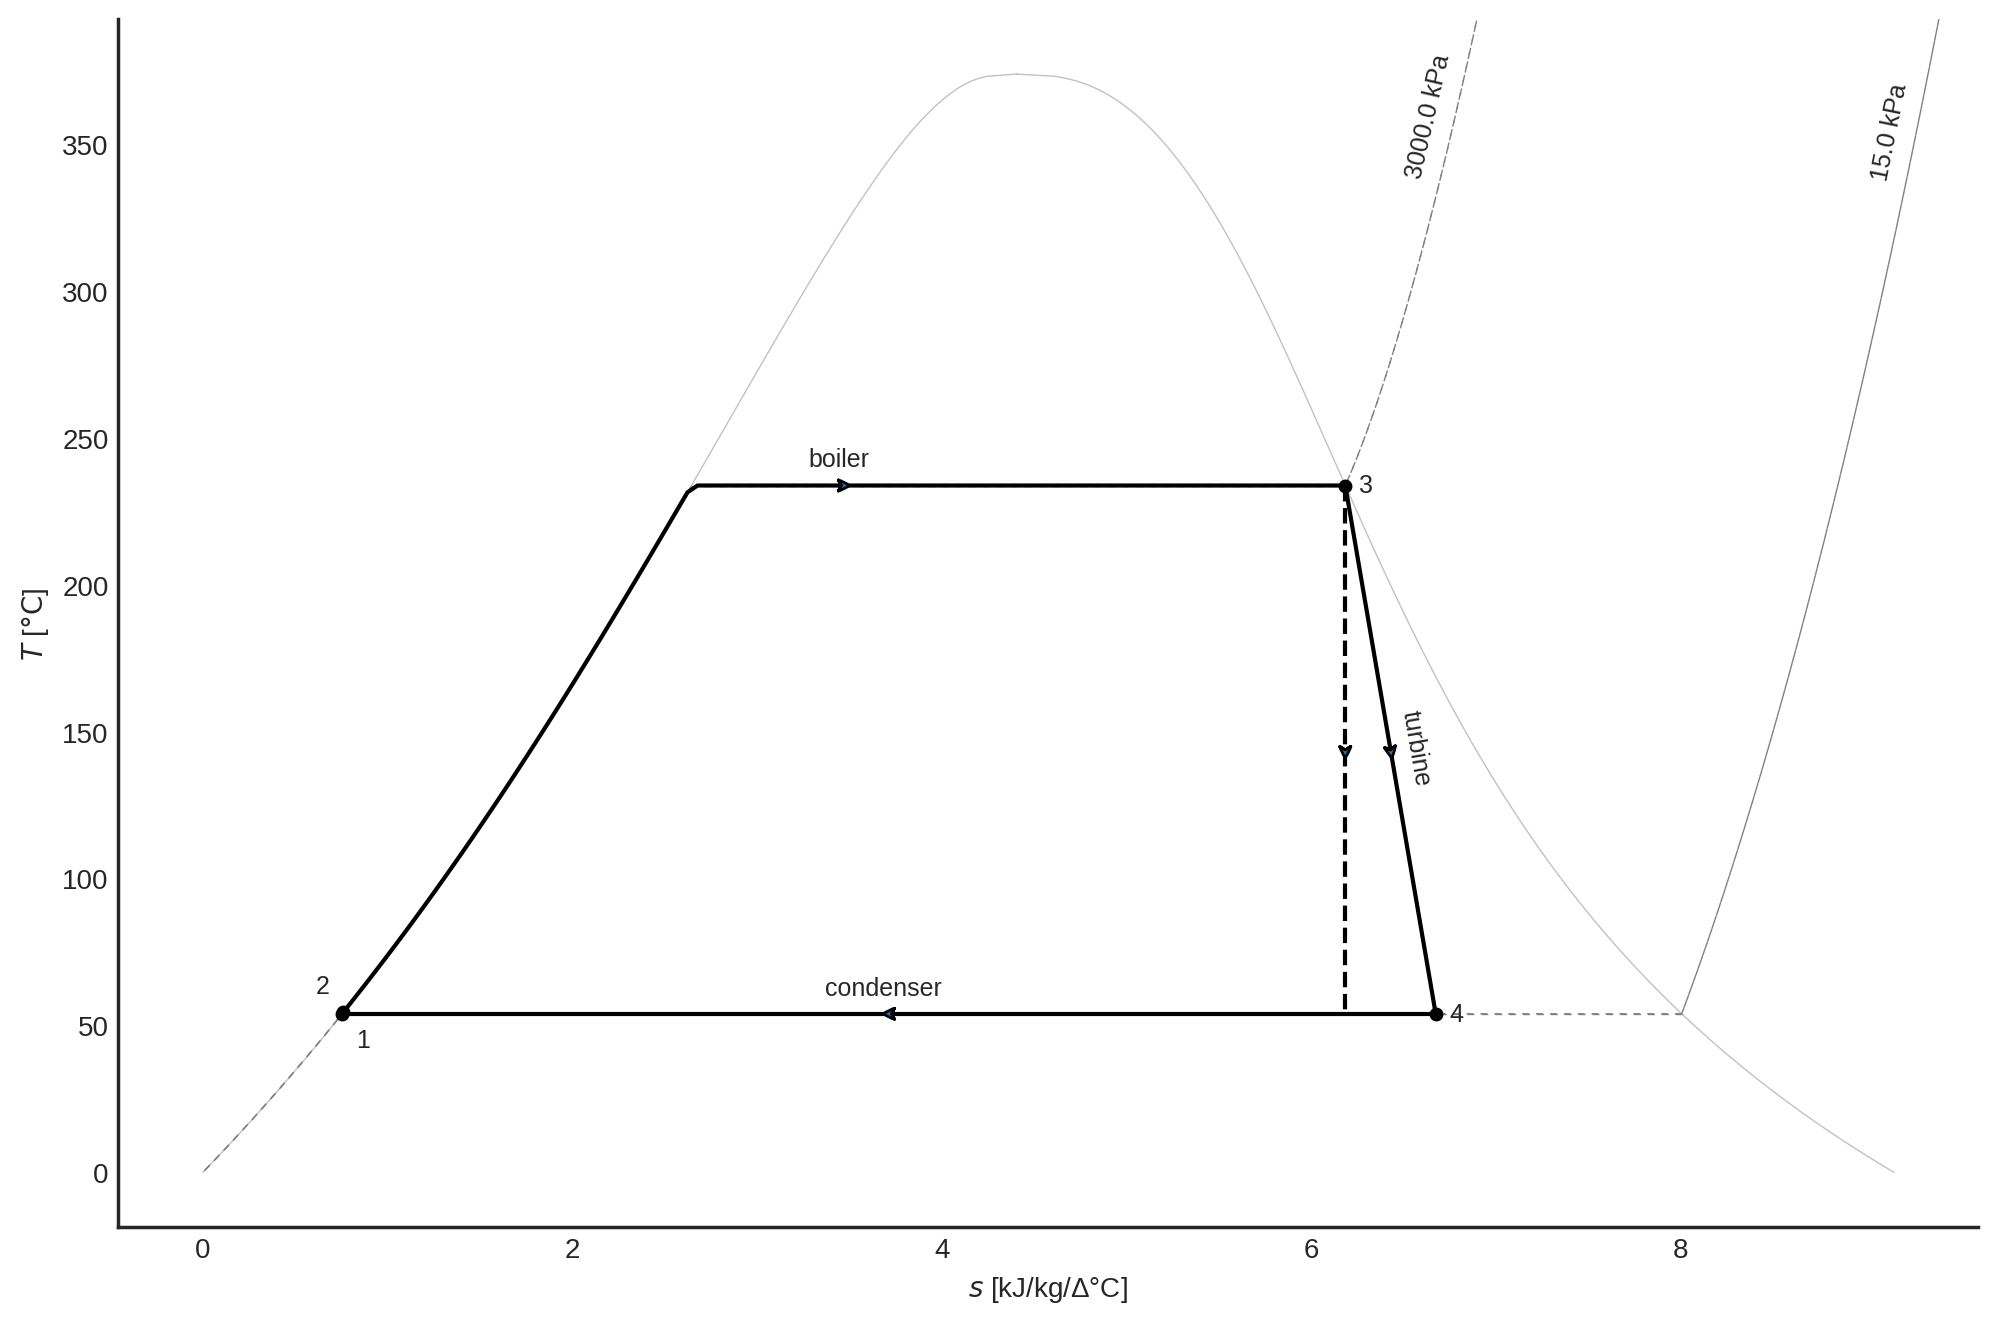

In [9]:
Ts = water.Ts_diagram()
Ts.plot_isobar(p[3],label=f'{p[3]}',pos=.9)
Ts.plot_isobar(p[4],label=f'{p[4]}',pos=.9)

Ts.plot_state(states[1],label_loc='south east')
Ts.plot_state(states[2],label_loc='north west')
Ts.plot_state(states[3],label_loc='east')
Ts.plot_state(states[4],label_loc='east')
    
Ts.plot_process(states[1],states[2],path='isentropic',arrow=False)
Ts.plot_process(states[2],states[3],path='isobaric',label='boiler')
Ts.plot_process(states[3],states[4],path='isentropic',label='turbine')
Ts.plot_process(states[4],states[1],path='isobaric',label='condenser');
Ts.plot_process(states[3],states['4s'],path='isentropic',linestyle='dashed');

In [10]:
Summary(show=True);

<IPython.core.display.Latex object>

,$T$ [°C],$p$ [kPa],$v$ [m³/kg],$h$ [kJ/kg],$s$ [kJ/K/kg],$x$ []
1,53.969313,15.0,0.001014,225.944282,0.754865,0.0
2,54.566922,3000.0,0.001013,230.985965,0.761023,-
2s,54.084027,3000.0,0.001013,228.969291,0.754865,-
3,233.853107,3000.0,0.066664,2803.153097,6.185583,1.0
4,53.969313,15.0,8.179994,2162.580397,6.675139,0.81634
4s,53.969313,15.0,7.503663,2002.437223,6.185583,0.748836


In [12]:
# Export your solution to submit to Canvas
# 1) Ensure all cells above show your final solution
# 2) Click the 'Save' button in the toolbar
# 3) Uncomment (remove the #) from the last line in this cell
# 4) Ensure the filename in the command below matches the filename of this notebook
# 5) Execute this cell to create an HTML file showing only the output 
# 6) Submit the .html file located in the folder with this notebook

# !jupyter nbconvert --to html_embed --no-input --no-prompt 'Ex10.2 Non-Ideal Rankine Cycle.ipynb'